In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

In [47]:
def base_data():
    
    ds = 'Dataset_Project_2.xlsx'
    df = pd.read_excel(ds, skiprows=1)
    
    return df

In [48]:
def run_profile(dataframe, output_location):
    
    profile = ProfileReport(dataframe, title='Housing Prices')
    profile.to_file(output_location)
    

In [49]:
def build_correlation_matrix(df):
        
    plt.figure(figsize=(10,10))
    sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

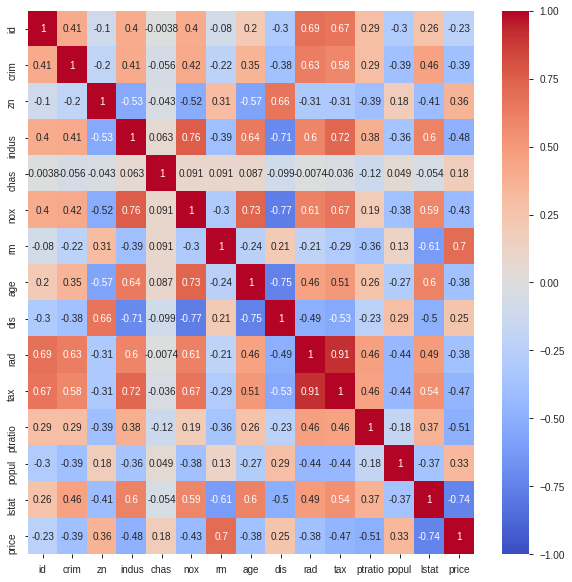

In [50]:
# Adding a Corr Matrix here for the sake of having it in the notebook
# It is in the profile as well
df= base_data()
build_correlation_matrix(df)

In [51]:
def drop_fields(df):
    
    '''
    chas has constant value "0.0" 
    
    '''
    
    df = df.drop(columns=['id','chas'])
    
    return df

In [52]:
def bump_outliers(df):
    
    '''
    This method iterates over the columns and removes any rows that are 3 std devs 
    outside of the mean in either direction
    '''
    
    for col in df.columns:
        
        std_dev = df[col].std()
        mean = df[col].mean()
        
        upper_bound = mean + 3*std_dev 
        lower_bound = mean - 3*std_dev
        
        df = df[df[col] > lower_bound]
        df = df[df[col] < upper_bound]
        
    
    return df

In [53]:
def apply_standard_scaler(df):
    
    '''
    This method applies the standard scaler transformation from scikit
    skips the composite and the label fields
    '''
    
    features = [f for f in df.columns if f !='price']
    
    std_scaler = StandardScaler()
    
    for col in features:
        
        df[col] = std_scaler.fit_transform(df[[col]])
        df[col] = df[col].round(4)
        
    return df

In [54]:
def main():
    
    # load dataset
    df = base_data()
    
    # Initial data profiling
    run_profile(df, 'data_profiles/pre_processing.html')
    
    # Processing steps
    df = bump_outliers(df)
    df = drop_fields(df)
    df = apply_standard_scaler(df)
    
    # Post processing profile
    run_profile(df, 'data_profiles/post_processing.html')
    
    # Write out
    df.to_csv('processed_data.csv', index=False)
    
    return df

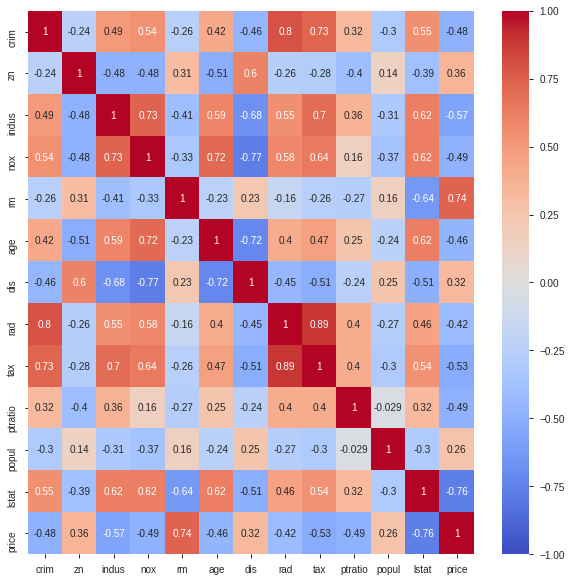

In [55]:
df = main()

'''
Interesting that the correlation warning disappeared in the 
profile, but I can still see the correlation between rad and tax.
I'll leave them in for now...

'''
build_correlation_matrix(df)